In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sklearn 
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest, chi2
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import missingno as miss

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
train_ds = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")
test_ds = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
data_ds = pd.concat([train_ds,test_ds])

<AxesSubplot:>

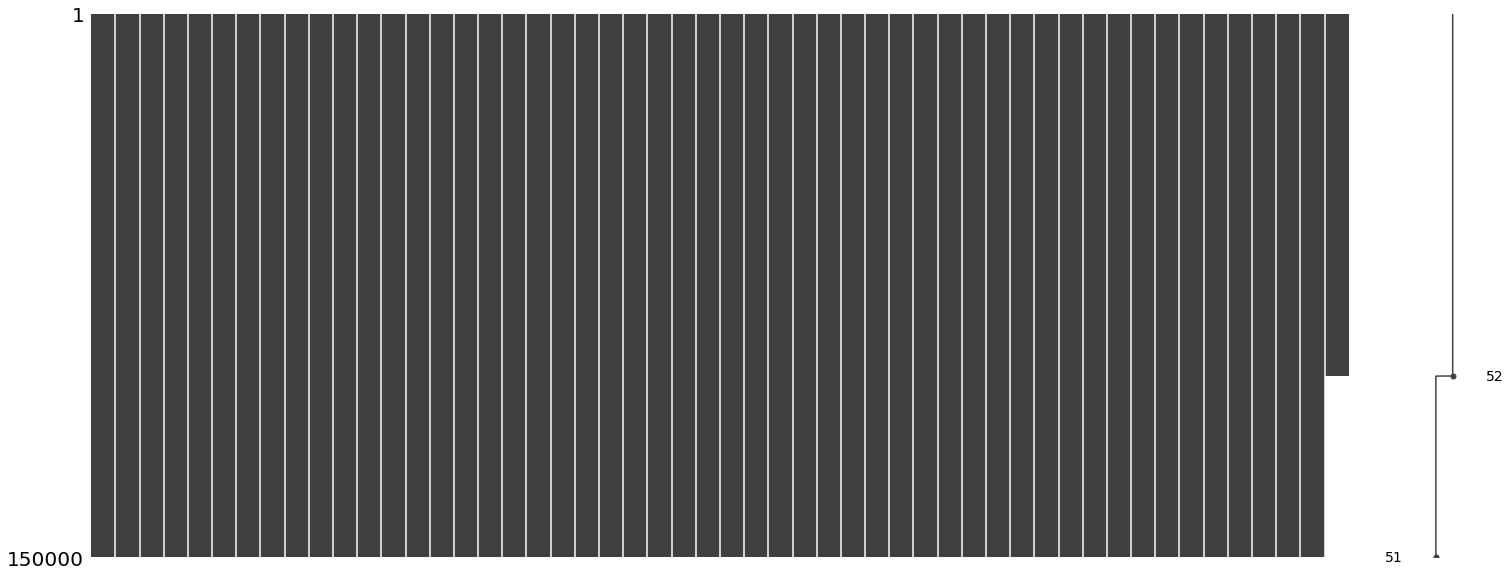

In [5]:
miss.matrix(data_ds)

In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [7]:
train_ds.shape

(100000, 52)

In [8]:
train_ds.target.unique()

array(['Class_2', 'Class_1', 'Class_4', 'Class_3'], dtype=object)

<AxesSubplot:>

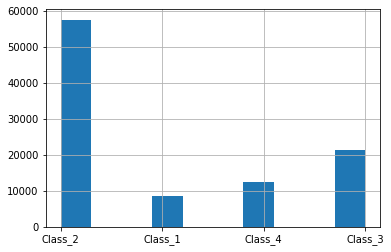

In [28]:
# Skewness of data 
data_ds.target.hist()

# Obseravtions
* number of columns: 52
* 51 feature of type int64
* 1 feature of type object, the target feature 
* No missing values
* the target is a column of 4 unique classes  
* Data is clearly skewed, target of class 2 is 6 times bigger than class 1 and 4 and 3 time more than class 3


In [29]:
#train_ds.corr()

**It's observable that the features are not corrletated, let's confirm it by plotting the heatmap**

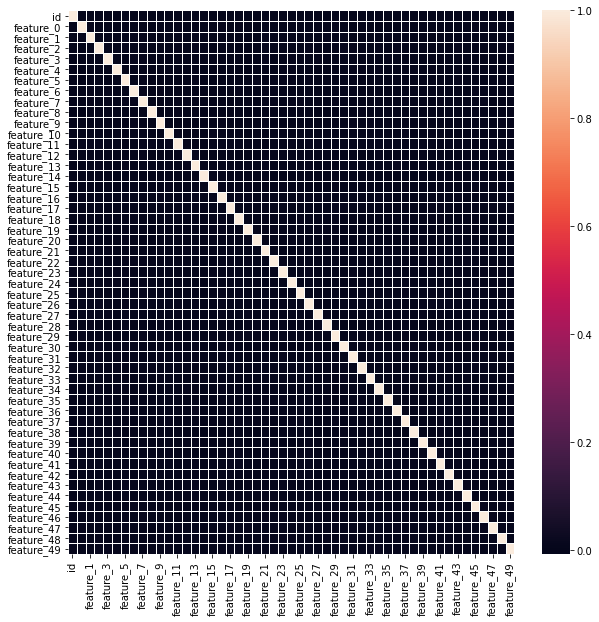

In [10]:
## check for corrlation 
import seaborn as sns
feats = data_ds.drop(columns=['target'])
plt.figure(figsize=(10,10))
ax = sns.heatmap(feats.corr(), linewidth=0.5,)
plt.show()

**Some possible feature selection techniques from sklearn**
* Removing features with low variance
* Select kbest 
* Recursive feature elimination

In [11]:
y = train_ds['target']
x = train_ds.drop(columns=['target']) 

In [17]:
# encode the target column 
enc = OrdinalEncoder()

#Given a dataset with two features,the encoder finds the unique values per feature and transform the data to an ordinal encoding.
enc.fit(np.array(y).reshape(-1, 1) )
enc.categories_


[array(['Class_1', 'Class_2', 'Class_3', 'Class_4'], dtype=object)]

In [18]:
y = enc.transform(np.array(y).reshape(-1, 1))

In [21]:
train_bst = SelectKBest( k=20).fit_transform(x, y)
train_bst.shape

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(100000, 20)

In [22]:
train_X, val_X, train_Y, val_Y = train_test_split(train_bst,y, train_size=0.8, random_state=42, shuffle=True)

In [23]:
from tensorflow.keras.optimizers import Adam
model = models.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')]
)
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [24]:
train_input = np.concatenate((train_X, train_Y), axis=1)
val_input = np.concatenate((val_X,val_Y), axis=1)

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train_X, train_Y, validation_data=(val_X,val_Y), epochs=6, callbacks=callback)

Epoch 1/6
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1775 - accuracy: 0.5596 - val_loss: 1.1100 - val_accuracy: 0.5767
Epoch 2/6
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1230 - accuracy: 0.5714 - val_loss: 1.1082 - val_accuracy: 0.5770
Epoch 3/6
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1174 - accuracy: 0.5741 - val_loss: 1.1067 - val_accuracy: 0.5771
Epoch 4/6
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1069 - accuracy: 0.5787 - val_loss: 1.1046 - val_accuracy: 0.5774
Epoch 5/6
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1117 - accuracy: 0.5758 - val_loss: 1.1049 - val_accuracy: 0.5774
Epoch 6/6
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1114 - accuracy: 0.5732 - val_loss: 1.1047 - val_accuracy: 0.5773


9106 row deleted 